In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load MP3
mp3_file = "piano_mp3/alb_esp1.mp3"
y, sr = librosa.load(mp3_file, sr=None) # with origional sample rate

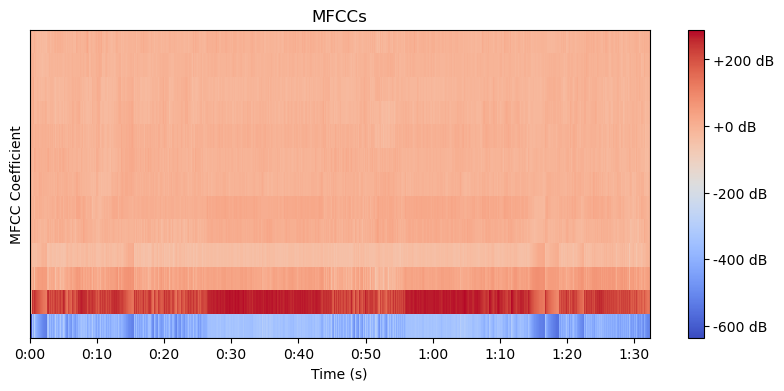

In [3]:
# Compute MFCCs
n_mfcc = 13  # Number of MFCC coefficients (adjust as needed)
hop_length = 512
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length)

# Visualize the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.0f dB")
plt.title("MFCCs")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficient")
plt.show()

In [4]:
# import and align midi
import pretty_midi

# Load the MIDI file
midi_file_path = 'piano_midi/alb_esp1_format0.mid'
midi_data = pretty_midi.PrettyMIDI(midi_file_path)

# Extract note information (start time, end time, pitch, velocity)
notes = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        notes.append({
            'start_time': note.start,
            'end_time': note.end,
            'pitch': note.pitch,
            'velocity': note.velocity
        })

In [5]:
# Align MIDI notes with MFCC frames
# hop_length = 512  # Adjust as needed
# for note in notes:
#     start_frame = int(note['start_time'] * sr / hop_length)
#     end_frame = int(note['end_time'] * sr / hop_length)
#     mfcc_features = mfccs[:, start_frame:end_frame]

In [6]:
# alignment visualization

# import matplotlib.pyplot as plt
# import librosa.display

# # Create a time axis for MFCCs
# duration = len(mfccs) / sr
# time_axis = librosa.times_like(mfccs, sr=sr)

# # Plot MFCCs
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(mfccs, x_axis='time', sr=sr)
# plt.colorbar(format='%+2.0f dB')
# plt.title('MFCCs')
# plt.xlabel('Time (s)')
# plt.ylabel('MFCC Coefficients')
# plt.show()

# # Now let's overlay the MIDI notes
# for note in notes:
#     plt.axvline(x=note['start_time'], color='r', linestyle='--', alpha=0.7)
#     plt.axvline(x=note['end_time'], color='g', linestyle='--', alpha=0.7)

# plt.title('MFCCs with MIDI Note Alignment')
# plt.show()

In [7]:
# alignment using pandas
import pandas as pd

# DF for notes information
midi_df = pd.DataFrame(notes)

# empty DF for aligned data
aligned_df = pd.DataFrame(columns=['start_time', 'end_time', 'pitch', 'velocity', 'mfccs'])

In [8]:
# creates paired data container as a list of dictionaries for every audio file
notes_mfccs = []

# Iterate through MIDI notes
for _, row in midi_df.iterrows():
    start_time = row['start_time']
    end_time = row['end_time']
    pitch = row['pitch']
    velocity = row['velocity']
    
    # Find MFCC frames within the MIDI note time range
    mfccs_within_range = mfccs[:, int(start_time * sr / hop_length):int(end_time * sr / hop_length)]
    
    # Append aligned data as a dictionary to the notes_mfccs list
    notes_mfccs.append({'start_time': start_time,'end_time': end_time,'pitch': pitch,'velocity': velocity,'mfccs': mfccs_within_range})

# Now 'notes_mfccs' contains aligned data